<a href="https://colab.research.google.com/github/gesielrios/caipyra/blob/master/adg_caipyra_2025.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir no Colab"/>
</a>

<center>
<img src="https://2025.caipyra.python.org.br/img/logo-caipyra.png" />

---
    
# Introdução à Análise de Dados Geoespaciais com Python

</center>

---

O objetivo do tutorial é realizar uma rápida introdução aos conceitos básicos e bibliotecas principais do ecossistema python essenciais para análise de dados geográficos.

<img src="https://images2.imgbox.com/33/85/LfpFCE1T_o.png" width="80%"/>

__Conteúdo:__

- Introdução
- Dados Espaciais
    - Vetoriais
    - Matriciais (*raster*)
- GeoPandas
- Sistemas de Coordenadas
  - Projeções Espaciais
- Operações geométricas comuns
- Visualização de dados geoespaciais

## Ferramentas e bibliotecas

<center>
    <img src="https://images2.imgbox.com/b6/2f/xLrsKueq_o.png" width=80%/>
</center>

* Ecossistema Python para GIS, Fonte: [Tenkanen, 2022](https://ecosystem.pythongis.org/).

<img src="https://pythongis.org/_images/python-gis-ecosystem.png" width="80%"/>

* [Google Colab ](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjRgtCVrqDqAhUUKLkGHc6jDnQQFjAAegQIARAC&url=https%3A%2F%2Fcolab.research.google.com%2F&usg=AOvVaw3A5aPK2kLFzKOzb6sOckVw): serviço de nuvem gratuito hospedado pelo Google para incentivar a pesquisa de Aprendizado de Máquina e Inteligência Artificial;

## Referências de apoio:

* [pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) é uma biblioteca para análise de dados em Python, de código aberto, licenciada por BSD, utiliza o conceito de dataframes que funcionam como uma matriz de dados, formada por linhas e colunas.

* Documentação da biblioteca [matplotlib](https://matplotlib.org/).

* Ciência de Dados com Reprodutibilidade usando Jupyter, disponível: https://doi.org/10.5753/sbc.6757.3.1

* Uma introdução à análise de dados usando pandas, matplotlib e seaborn, disponívei em: https://sol.sbc.org.br/index.php/eri-mt/article/view/31223

* Introdução à Análise Exploratória de Dados com Python, disponível em https://www.researchgate.net/publication/336778766_Introducao_a_Analise_Exploratoria_de_Dados_com_Python

* Introdução à Análise de Dados Geoespaciais com Python, disponível em https://sol.sbc.org.br/livros/index.php/sbc/catalog/download/76/325/581-1?inline=1

# Introdução

A análise de dados geoespaciais envolve o estudo de informações que possuem uma componente espacial, permitindo a compreensão de padrões, relações e fenômenos que ocorrem em um espaço geográfico. Python se consolidou como uma das principais ferramentas para esse tipo de análise, graças à sua flexibilidade, vasta biblioteca de pacotes especializados e uma comunidade ativa de usuários.



## Análise Espacial

Consiste em mensurar propriedades e relacionamentos, levando em conta a localização espacial do fenômeno em estudo de forma explícita.

Um exemplo pioneiro, onde intuitivamente se incorporou a categoria espaço às análises realizadas foi realizado no século XIX por John Snow.

- Em 1985, ocorria em Londres uma das várias epidemias de cólera, pouco se sabia então sobre o mecanismos causais da doença.
- Duas vertentes científicas procuravam explicá-la: uma relacionando-a aos miasmas, concentrados nas regiões bais e pantanosas da cidade, e outra à ingestão de água insalubre.

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Snow-cholera-map.jpg/300px-Snow-cholera-map.jpg" width=30%/>
</center>

O mapa localizada a residência dos óbitos ocasionadas pela doença e as bombas de água que abasteciam a cidade.


# Dados Espaciais

Para poder trabalhar com objetos geográficos do mundo real (como estradas ou lagos), precisamos representá-los em um formato que o computador possa entender e trabalhar.

Essas representações são simplificações do mundo real que são tipicamente conhecidas como **dados espaciais**. Dados espaciais podem ser definidos como dados ou informações associados às coordenadas geográficas que representam a superfície terrestre. Esse tipo de dados possui duas propriedades:

- magnitude da variação do atributo do fenômeno em estudo (valor da variável)

- localização geográfica do atributo (como os dados estão localizados)

Os dados espaciais podem ser dividos em: dados  e dados vetoriais.

- **Dados matriciais (*raster*):** essa estrutura de dados armazena informações geográficas por meio de grades ou matrizes.
    - Um exemplo clássico de dados *raster* são as imagens de satélite obtidas por meio de sensoriamento remoto, nas quais, cada pixel da imagem estará sempre associado a coordenadas geográficas que representam determinada região da superfície terrestre.
- **Dados vetoriais:** essa estrutura de dados é representada por informações geográficas associadas a pontos, linhas e polígonos, padronizado pela ISO 19125 (https://www.ogc.org/standard/sfa/).
    - Os limites de uma propriedade, a localização de um empreendimento e delimitações de estradas, biomas e bacias hidrográficas são exemplos de dados de natureza vetorial.


Exemplo de representações vetoriais e raster de estradas e edifícios.

<img src="https://pythongis.org/_images/vector_vs_raster.png" width="70%" />



## Dados vetoriais

Os objetos geométricos mais fundamentais ao trabalhar com dados espaciais em formato vetorial são pontos, linhas e áreas.


* **Ponto**: representa um simples ponto no espaço geográfico e a localização do ponto no espaço é determinada com coordenadas.
* **linhas**: respresenta uma sequência de pontos a partir de uma linha.
* **Polígonos**: representa uma área preenchida.


Também é possível ter uma coleção de objetos geométricos (ou seja, vários pontos, linhas ou áreas) representados como MultiPoint, MultiLineString e MultiPolygon. As coleções de geometria podem ser úteis, por exemplo, quando você deseja apresentar vários polígonos de construção pertencentes à mesma propriedade como uma única entidade (como uma casa de veraneio finlandesa que normalmente tem um edifício de sauna separado). Além destes, você pode às vezes ouvir sobre outros objetos de geometria, como $\verb!Curve!$, $\verb!Surface!$ ou $\verb!GeometryCollection!$, mas estes são basicamente implementados pelos mesmos tipos de geometria $\verb!Point!$, $\verb!LineString!$ e $\verb!Polygon!$, portanto, não os usamos realmente na prática.

Para maiores informações consulte: [Documentação shapely.](https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects)



<center>
    <img src="https://pythongis.org/_images/vector_data_model.png" width=80%/>
</center>

E cada um deles também pode ser combinado em geometrias de várias partes (consulte  para uma visão geral).

### A biblioteca `shapely`

Os objetos geométricos individuais são fornecidos pela biblioteca [`shapely`] (https://shapely.readthedocs.io/en/stable/)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from shapely.geometry import (
    Point, LineString, Polygon, MultiPoint,
    MultiLineString, MultiPolygon
)

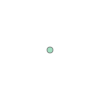

In [3]:
ponto = Point(0, 0)
ponto

In [4]:
print(ponto)

POINT (0 0)


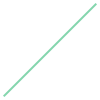

In [5]:
linha = LineString([(0, 0), (1, 1)])
linha

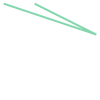

In [6]:
outra_linha = LineString([(0,1),(3,0),(1,1)])
outra_linha

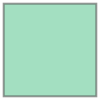

In [7]:
poligono = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
poligono

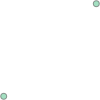

In [8]:
pontos = MultiPoint([(0, 0), (1, 1)])
pontos

In [9]:
len(pontos.geoms)

2

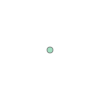

In [10]:
pontos.centroid

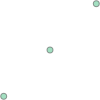

In [11]:
pontos_e_centroids = MultiPoint([(0, 0), (1, 1), pontos.centroid])
pontos_e_centroids

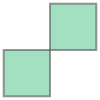

In [12]:
a = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]
b = [(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)]

multi = MultiPolygon([[a, []], [b, []]])
multi

### Formatos para criar e compartilhar o conjunto de dados espaciais vetoriais

Dados vetoriais podem ser armazenados de diferentes maneiras. Duas das abordagens mais amplamente utilizadas são armazenar os dados em um arquivo de dados espaciais que é armazenado em disco ou armazenar os dados em um banco de dados com reconhecimento espacial, como o banco de dados PostGIS que suporta o armazenamento de dados espaciais.

Ao armazenar dados em um arquivo de dados, há várias opções para escolher em termos de formatos de dados. Você pode facilmente ler e gravar dados vetoriais espaciais em aproximadamente oitenta formatos de arquivo diferentes que são suportados pela Geospatial Data Abstraction Library (GDAL). Abaixo, forneceremos informações sobre alguns formatos de dados vetoriais espaciais selecionados que são comumente usados para armazenar dados espaciais.

- **GeoJSON:** é um formato de intercâmbio de dados geoespaciais de padrão aberto que representa características geográficas simples e seus atributos não espaciais, ou seja, informações não espaciais sobre uma característica geográfica.

```
{"type": "FeatureCollection",
  "features": [
    {"type": "Feature", "properties": {"id": 75553155, "timestamp": 1494181812},
      "geometry": {"type": "MultiLineString",
        "coordinates": [[[26.938, 60.520], [26.938, 60.520]], [[26.937, 60.521],
                         [26.937, 60.521]], [[26.937, 60.521], [26.936, 60.522]]]
      }
    },
    {"type": "Feature", "properties": {"id": 424099695, "timestamp": 1465572910},
      "geometry": {"type": "Polygon",
        "coordinates": [[[26.935, 60.521], [26.935, 60.521], [26.935, 60.521],
                         [26.935, 60.521], [26.935, 60.521]]]
      }
    }
  ]
}
```

- $\verb!shapefile!$: um formato não-topológico para bases de dados geoespaciais e vetoriais. É considerado um formato aberto, apesar de proprietário. O formato \verb!shapefile! consiste numa coleção de arquivos de mesmo nome e terminações diferentes, com três arquivos obrigatórios para o funcionamento correto.

    - $\verb!.shp!$: contém a geometria;
    - $\verb!.prj!$: contém a projeção da geometria;
    - $\verb!.dbf!$: contém os atributos como uma tabela relacional.

## Bases de Dados Geoespaciais

Precisamos agora ter acesso a um conjunto de dados geográficos e existem diversas plataformas governamentais que disponibilizam esses dados gratuitamente, como, por exemplo:

- IBGE (Instituto Brasileiro de Geografia e Estatística)
- ANA (Agência Nacional das Águas)
- Secretaria de Infraestrutura e Meio Ambiente de São Paulo (SIMA)
- Instituto Nacional de Pesquisas Espaciais (INPE)

Outros repositórios de dados espaciais
- https://www.geoaplicada.com/dados-espaciais/
- https://geodacenter.github.io/data-and-lab/
- https://inde.gov.br/

Bases abertas de dados espaciais de Ribeirão Preto - SP
- https://webgis.ribeiraopreto.sp.gov.br/portal/apps/sites/#/geoportal

### GEOBR

O **geobr** é um pacote computacional para baixar conjuntos de dados espaciais oficiais do Brasil. O pacote inclui uma ampla gama de dados geoespaciais em formato geopackage (como shapefiles, mas melhor), disponível em várias escalas geográficas e por vários anos com atributos harmonizados, projeção e topologia (veja a lista detalhada de conjuntos de dados disponíveis abaixo).

- O pacote está atualmente disponível em R e Python .

- Maiores informações acesse: https://github.com/ipeaGIT/geobr

# Geopandas

O GeoPandas é um projeto *open source* que foi criado para tornar a manipulação de dados geoespaciais em Python uma tarefa mais simples. Ele estende as estruturas de dados do Pandas, que são o dataframe e o series, possibilitando a manipulação e tratamento de arquivos dessa natureza.

A estrutura de dados central do GeoPandas é $\verb!geopandas.GeoDataFrame!$, uma subclasse do pandas.DataFrame capaz de armazenar colunas geométricas e realizar operações espaciais. As geometrias são tratadas como \verb!geopandas.GeoSeries!, uma subclasse de \$\verb!pandas.Series!$. Portanto, seu GeoDataFrame é uma combinação de Series com seus dados (numéricos, booleanos, texto etc.) e GeoSeries com geometrias (pontos, polígonos e etc.)

<center>
    <img src="https://images2.imgbox.com/64/4a/JPMzRAuw_o.png" width=80%/>
</center>

### Importando dados geoespaciais

In [13]:
##instalar o geodatasets e geobr
!pip install geodatasets geobr

In [14]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import geobr

In [16]:
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

In [17]:
estado_sao_paulo_gdf = geobr.read_state(code_state='SP', year=2020)
estado_sao_paulo_gdf.head()

code_state abbrev_state name_state  code_region name_region  \
0        35.0           SP  São Paulo          3.0     Sudeste   

                                            geometry  
0  MULTIPOLYGON (((-48.03716 -25.35794, -48.0375 ...

In [18]:
estado_sao_paulo_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code_state    1 non-null      float64 
 1   abbrev_state  1 non-null      object  
 2   name_state    1 non-null      object  
 3   code_region   1 non-null      float64 
 4   name_region   1 non-null      object  
 5   geometry      1 non-null      geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 180.0+ bytes


<Axes: >

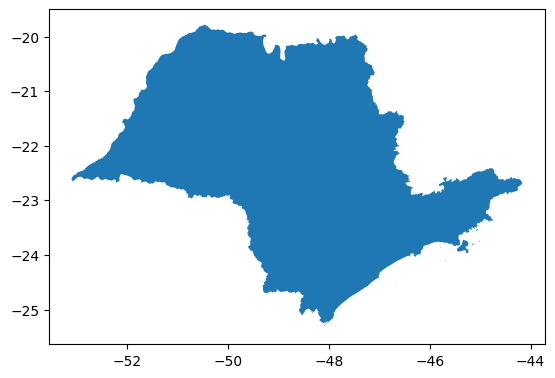

In [19]:
estado_sao_paulo_gdf.plot()

In [20]:
estados_br_gdf = geobr.read_state(code_state='all', year=2020)
estados_br_gdf.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazônas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  
0  MULTIPOLYGON (((-65.3815 -10.42907, -65.38013 ...  
1  MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...  
2  MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...  
3  MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...  
4  MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...

In [21]:
estados_br_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code_state    27 non-null     float64 
 1   abbrev_state  27 non-null     object  
 2   name_state    27 non-null     object  
 3   code_region   27 non-null     float64 
 4   name_region   27 non-null     object  
 5   geometry      27 non-null     geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 1.4+ KB


<Axes: >

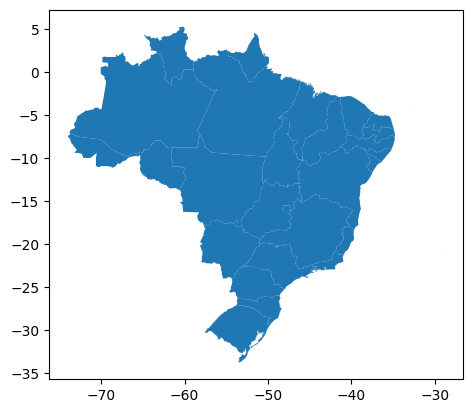

In [22]:
estados_br_gdf.plot()

In [23]:
## Explorando outras funções do GEOBR

sp_extras = {
    'Estado de São Paulo': geobr.read_state(code_state='SP', year=2020),
    'Meso Regiões\nEstado de São Paulo': geobr.read_meso_region(code_meso='SP', year=2020),
    'Micro Regiões\nEstado de São Paulo': geobr.read_micro_region(code_micro='SP', year=2020),
    'Municípios\nEstado de São Paulo': geobr.read_municipality(code_muni='SP', year=2020)
}

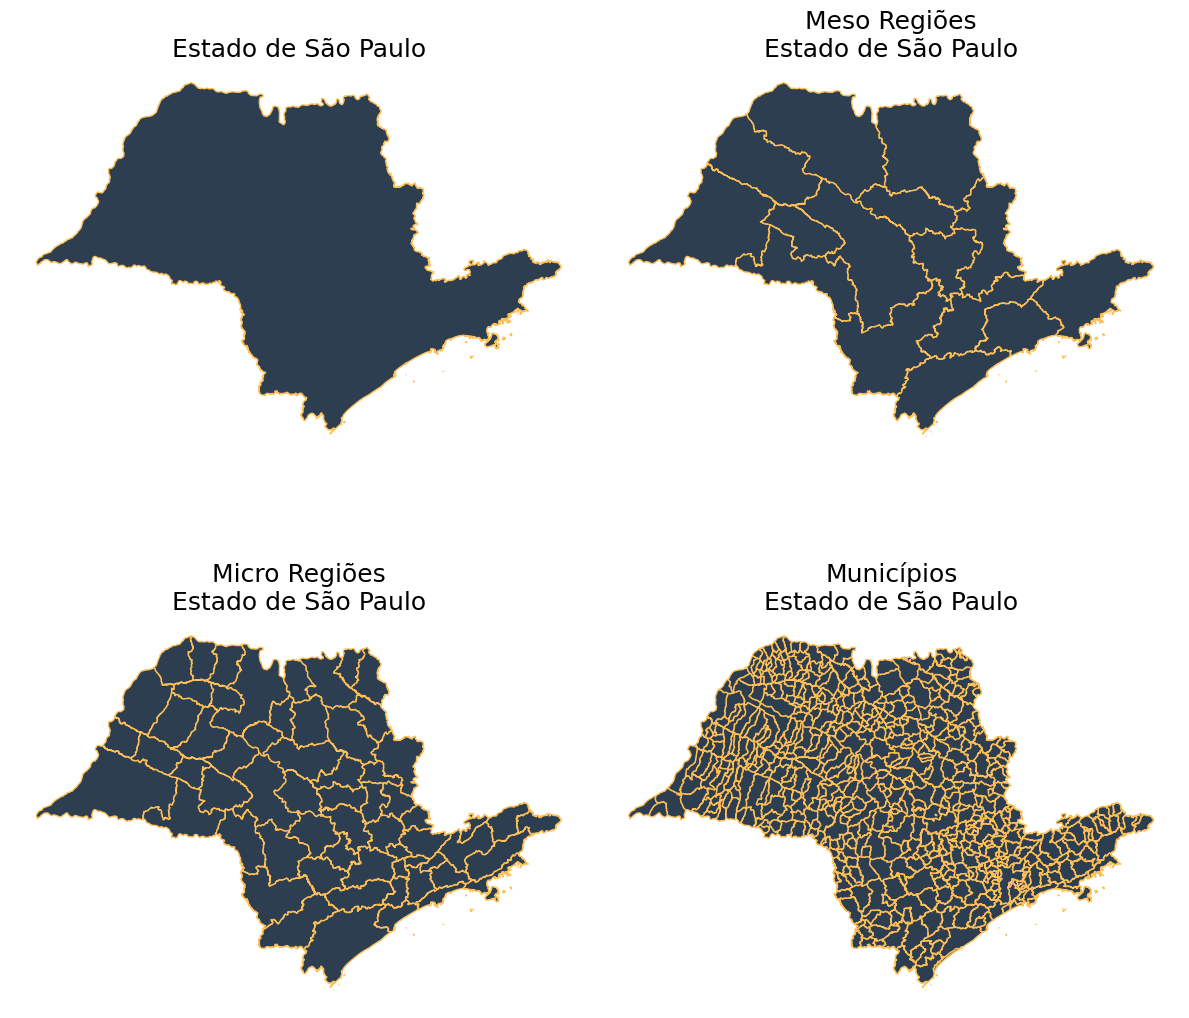

In [24]:
nrows = 2
ncols = 2
fontsize = 18

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))

types_iter = iter(sp_extras.items())

for i in range(nrows):
    for j in range(ncols):

        name, df = next(types_iter)

        df.plot(facecolor='#2D3E50', edgecolor='#FEBF57', ax=ax[i][j])

        ax[i][j].set_title(name, fontsize=fontsize)
        ax[i][j].axis('off')

fig.tight_layout()
plt.show()

In [25]:
#Município de Ribeirão Preto
# https://www.ibge.gov.br/cidades-e-estados/sp/ribeirao-preto.html

code_muni = 3543402

ribeirao_preto_gdf = geobr.read_municipality(code_muni=code_muni, year=2020)
ribeirao_preto_gdf.head()

code_muni       name_muni  code_state abbrev_state name_state  \
487  3543402.0  Ribeirão Preto        35.0           SP  São Paulo   

     code_region name_region  \
487          3.0     Sudeste   

                                              geometry  
487  MULTIPOLYGON (((-47.78684 -21.06144, -47.77857...

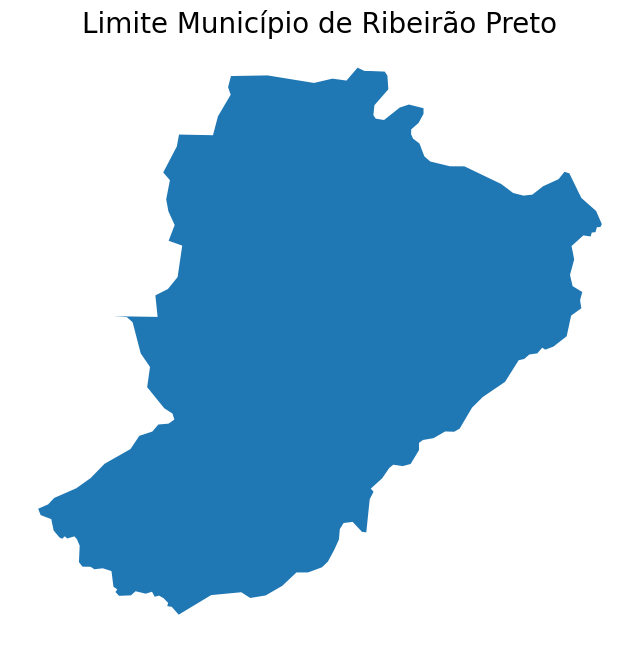

In [26]:
f, ax = plt.subplots(figsize=(8, 8))
ribeirao_preto_gdf.plot(ax=ax)
ax.set_title('Limite Município de Ribeirão Preto', fontsize=20)
ax.axis('off')
plt.show()

In [27]:
## É possível também buscar os setores censitarios a partir do site do IBGE
url_bairros_sp = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_de_setores_censitarios__divisoes_intramunicipais/censo_2022/bairros/shp/UF/SP_bairros_CD2022.zip'
bairros_sp = gpd.read_file(url_bairros_sp)
bairros_sp.head()

CD_REGIAO NM_REGIAO CD_UF      NM_UF   CD_MUN   NM_MUN    CD_DIST  NM_DIST  \
0         3   Sudeste    35  São Paulo  3502309  Anhembi  350230905  Anhembi   
1         3   Sudeste    35  São Paulo  3502309  Anhembi  350230905  Anhembi   
2         3   Sudeste    35  São Paulo  3502309  Anhembi  350230905  Anhembi   
3         3   Sudeste    35  São Paulo  3502309  Anhembi  350230905  Anhembi   
4         3   Sudeste    35  São Paulo  3502309  Anhembi  350230905  Anhembi   

    CD_SUBDIST NM_SUBDIST   CD_BAIRRO                     NM_BAIRRO CD_RGINT  \
0  35023090500       None  3502309003           Jardim Nova Anhembi     3503   
1  35023090500       None  3502309002                 Vila São José     3503   
2  35023090500       None  3502309005           Jardim Bandeirantes     3503   
3  35023090500       None  3502309009              Altos de Anhembi     3503   
4  35023090500       None  3502309008  Nossa Senhora dos Navegantes     3503   

  NM_RGINT  CD_RGI    NM_RGI CD_CONCURB NM_CONCURB  \
0    Bauru  350011  Botucatu       None       None   
1    Bauru  350011  Botucatu       None       None   
2    Bauru  350011  Botucatu       None       None   
3    Bauru  350011  Botucatu       None       None   
4    Bauru  350011  Botucatu       None       None   

                                            geometry  
0  POLYGON ((-48.12777 -22.79463, -48.12835 -22.7...  
1  POLYGON ((-48.13128 -22.79259, -48.13133 -22.7...  
2  POLYGON ((-48.12496 -22.78816, -48.12525 -22.7...  
3  POLYGON ((-48.14059 -22.7949, -48.14058 -22.79...  
4  POLYGON ((-48.13349 -22.78501, -48.1335 -22.78...

In [28]:
bairros_sp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CD_REGIAO   2170 non-null   object  
 1   NM_REGIAO   2170 non-null   object  
 2   CD_UF       2170 non-null   object  
 3   NM_UF       2170 non-null   object  
 4   CD_MUN      2170 non-null   object  
 5   NM_MUN      2170 non-null   object  
 6   CD_DIST     2170 non-null   object  
 7   NM_DIST     2170 non-null   object  
 8   CD_SUBDIST  2170 non-null   object  
 9   NM_SUBDIST  0 non-null      object  
 10  CD_BAIRRO   2170 non-null   object  
 11  NM_BAIRRO   2170 non-null   object  
 12  CD_RGINT    2170 non-null   object  
 13  NM_RGINT    2170 non-null   object  
 14  CD_RGI      2170 non-null   object  
 15  NM_RGI      2170 non-null   object  
 16  CD_CONCURB  1803 non-null   object  
 17  NM_CONCURB  1803 non-null   object  
 18  geometry    2170 non-null   geometry
dty

In [29]:
bairros_rp = bairros_sp.query("NM_MUN == 'Ribeirão Preto'")
bairros_rp.head()

CD_REGIAO NM_REGIAO CD_UF      NM_UF   CD_MUN          NM_MUN    CD_DIST  \
1455         3   Sudeste    35  São Paulo  3543402  Ribeirão Preto  354340205   
1456         3   Sudeste    35  São Paulo  3543402  Ribeirão Preto  354340205   
1457         3   Sudeste    35  São Paulo  3543402  Ribeirão Preto  354340205   
1458         3   Sudeste    35  São Paulo  3543402  Ribeirão Preto  354340205   
1459         3   Sudeste    35  São Paulo  3543402  Ribeirão Preto  354340205   

             NM_DIST   CD_SUBDIST NM_SUBDIST   CD_BAIRRO  \
1455  Ribeirão Preto  35434020500       None  3543402027   
1456  Ribeirão Preto  35434020500       None  3543402003   
1457  Ribeirão Preto  35434020500       None  3543402050   
1458  Ribeirão Preto  35434020500       None  3543402055   
1459  Ribeirão Preto  35434020500       None  3543402032   

                       NM_BAIRRO CD_RGINT        NM_RGINT  CD_RGI  \
1455      Subsetor Sul - 4 (S-4)     3508  Ribeirão Preto  350031   
1456    Subsetor Norte - 2 (N-2)     3508  Ribeirão Preto  350031   
1457  Subsetor Leste - 11 (L-11)     3508  Ribeirão Preto  350031   
1458  Subsetor Oeste - 15 (O-15)     3508  Ribeirão Preto  350031   
1459    Subsetor Oeste - 2 (O-2)     3508  Ribeirão Preto  350031   

              NM_RGI CD_CONCURB         NM_CONCURB  \
1455  Ribeirão Preto    3543402  Ribeirão Preto/SP   
1456  Ribeirão Preto    3543402  Ribeirão Preto/SP   
1457  Ribeirão Preto    3543402  Ribeirão Preto/SP   
1458  Ribeirão Preto    3543402  Ribeirão Preto/SP   
1459  Ribeirão Preto    3543402  Ribeirão Preto/SP   

                                               geometry  
1455  POLYGON ((-47.81483 -21.2152, -47.81487 -21.21...  
1456  POLYGON ((-47.81886 -21.15118, -47.81965 -21.1...  
1457  MULTIPOLYGON (((-47.73014 -21.20682, -47.73504...  
1458  POLYGON ((-47.853 -21.13178, -47.85455 -21.132...  
1459  POLYGON ((-47.81339 -21.17343, -47.81341 -21.1...

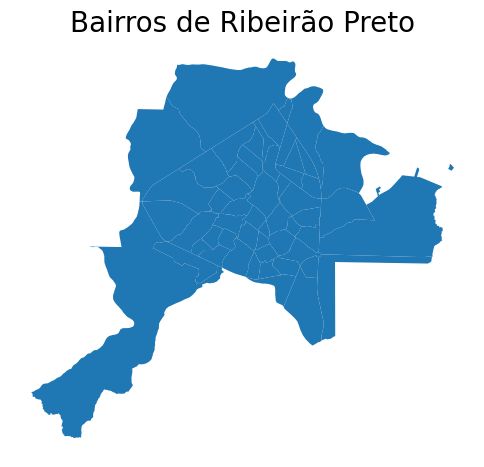

In [30]:
f, ax = plt.subplots(figsize=(6, 6))
bairros_rp.plot(ax=ax)
ax.set_title('Bairros de Ribeirão Preto', fontsize=20)
ax.axis('off')
plt.show()

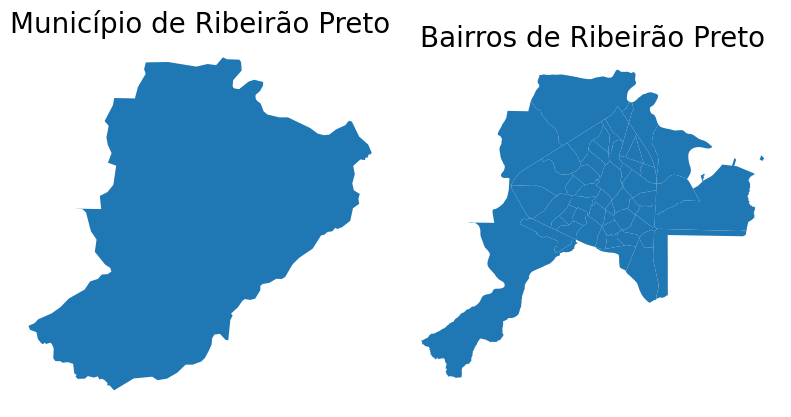

In [31]:
titles = ['Município de Ribeirão Preto', 'Bairros de Ribeirão Preto']

f, ax = plt.subplots(1, 2, figsize=(8, 8))

for i, df in enumerate([ribeirao_preto_gdf, bairros_rp]):
    df.plot(ax=ax[i])
    ax[i].set_title(titles[i], fontsize=20)
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [32]:
## Usar dados do G Extract
padarias_rp = pd.read_csv('/content/padarias-rp.csv')
padarias_rp.head(2)

Name  \
0  Padaria Nossa Senhora Aparecida   
1                   Padaria Panini   

                                         Fulladdress  \
0  R. Constituicão, 1365 - Vila Tiberio, Ribeirão...   
1  Av. Independência, 2886 - Alto da Boa Vista, R...   

                                        Street         Municipality  \
0         R. Constituicão, 1365 - Vila Tiberio  Ribeirão Preto - SP   
1  Av. Independência, 2886 - Alto da Boa Vista  Ribeirão Preto - SP   

                                          Categories           Phone  \
0  Padaria,Restaurante de café da manhã,Confeitar...  (16) 3630-1464   
1               Padaria,Restaurante de café da manhã  (16) 3621-9188   

                             Phones Claimed  Review Count  Average Rating  \
0  (16) 3630-1464, +55 16 3630-1464      NO          3562             4.7   
1  (16) 3621-9188, +55 16 3621-9188     YES          5537             4.5   

   ...                     Place Id                          Kgmid  \
0  ...  ChIJDeQrGWO-uZQRpsvDQHsITy8  *** Visible after upgrade ***   
1  ...  ChIJNa-s5eS_uZQRu3ci7EmwnSo  *** Visible after upgrade ***   

                       Plus code           Google Knowledge URL  \
0  *** Visible after upgrade ***  *** Visible after upgrade ***   
1  *** Visible after upgrade ***  *** Visible after upgrade ***   

                           Email                  Social Medias  \
0  *** Visible after upgrade ***  *** Visible after upgrade ***   
1  *** Visible after upgrade ***  *** Visible after upgrade ***   

                        Facebook                      Instagram  \
0  *** Visible after upgrade ***  *** Visible after upgrade ***   
1  *** Visible after upgrade ***  *** Visible after upgrade ***   

                         Twitter                           Yelp  
0  *** Visible after upgrade ***  *** Visible after upgrade ***  
1  *** Visible after upgrade ***  *** Visible after upgrade ***  

[2 rows x 29 columns]

In [33]:
padarias_rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  20 non-null     object 
 1   Fulladdress           20 non-null     object 
 2   Street                20 non-null     object 
 3   Municipality          20 non-null     object 
 4   Categories            20 non-null     object 
 5   Phone                 20 non-null     object 
 6   Phones                20 non-null     object 
 7   Claimed               20 non-null     object 
 8   Review Count          20 non-null     int64  
 9   Average Rating        20 non-null     float64
 10  Review URL            20 non-null     object 
 11  Google Maps URL       20 non-null     object 
 12  Latitude              20 non-null     float64
 13  Longitude             20 non-null     float64
 14  Website               16 non-null     object 
 15  Domain                16 

<Axes: >

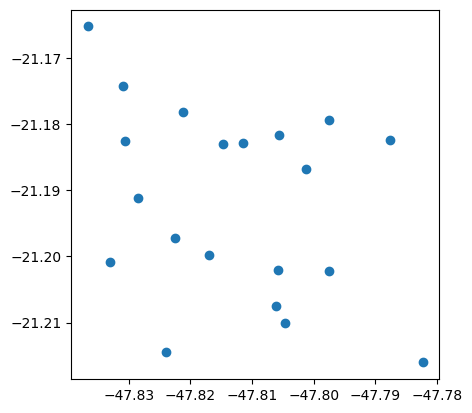

In [34]:
padarias_rp_gdf = gpd.GeoDataFrame(
    padarias_rp,
    geometry = gpd.points_from_xy(
        padarias_rp.Longitude, padarias_rp.Latitude
    ),
    crs="EPSG:4326"
)

padarias_rp_gdf.plot()

In [35]:
padarias_rp_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  20 non-null     object  
 1   Fulladdress           20 non-null     object  
 2   Street                20 non-null     object  
 3   Municipality          20 non-null     object  
 4   Categories            20 non-null     object  
 5   Phone                 20 non-null     object  
 6   Phones                20 non-null     object  
 7   Claimed               20 non-null     object  
 8   Review Count          20 non-null     int64   
 9   Average Rating        20 non-null     float64 
 10  Review URL            20 non-null     object  
 11  Google Maps URL       20 non-null     object  
 12  Latitude              20 non-null     float64 
 13  Longitude             20 non-null     float64 
 14  Website               16 non-null     object  
 15  

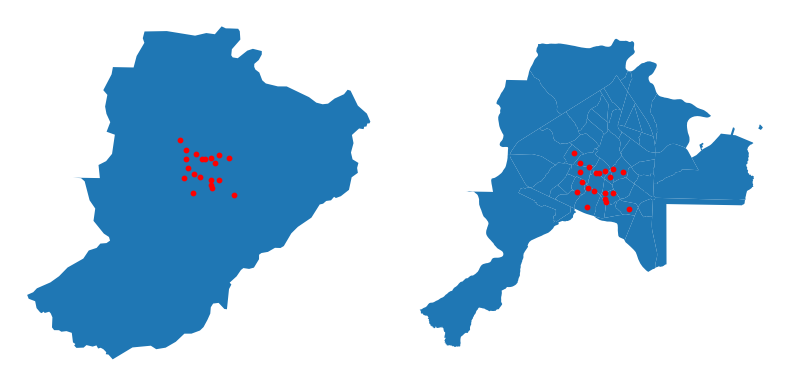

In [36]:
f, ax = plt.subplots(1, 2, figsize=(8, 8))

for i, df in enumerate([ribeirao_preto_gdf, bairros_rp]):
    df.plot(ax=ax[i])
    padarias_rp_gdf.plot(ax=ax[i], color='red', markersize=10)
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [37]:
## Setores censitarios do Estado de São Paulo através do GEOBR
setores_censitarios_df = geobr.read_census_tract(code_tract='SP', year=2020)
setores_censitarios_df.head(2)

code_tract                                          zone  code_muni  \
0  3.500105e+14  Área Urbana de Alta Densidade de Edificações  3500105.0   
1  3.500105e+14  Área Urbana de Alta Densidade de Edificações  3500105.0   

    name_muni  code_subdistrict name_subdistrict  code_district name_district  \
0  Adamantina      3.500105e+10             None    350010505.0    Adamantina   
1  Adamantina      3.500105e+10             None    350010505.0    Adamantina   

   code_state abbrev_state name_state  \
0        35.0           SP  São Paulo   
1        35.0           SP  São Paulo   

                                            geometry  
0  MULTIPOLYGON (((-51.07255 -21.68865, -51.07212...  
1  MULTIPOLYGON (((-51.07378 -21.6862, -51.07821 ...

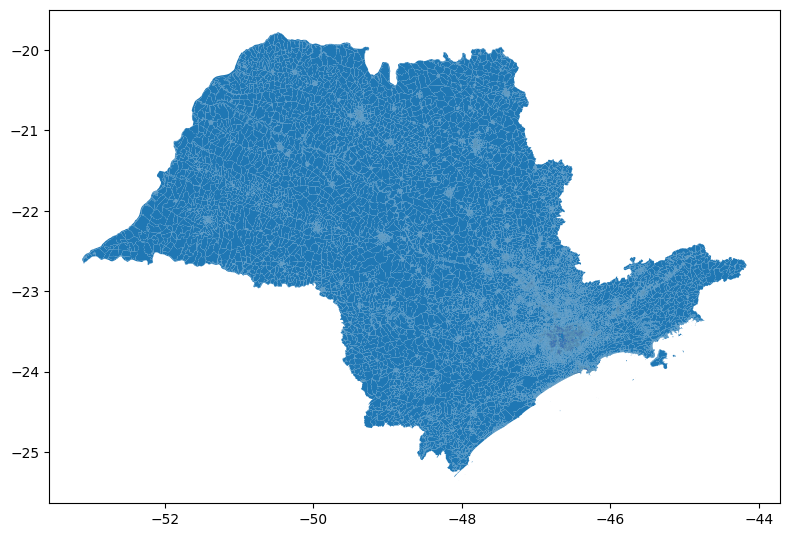

In [38]:
f, ax = plt.subplots(figsize=(8, 8))
setores_censitarios_df.plot(ax=ax)
plt.tight_layout()
plt.show()

In [39]:
setores_censitarios_ribeirao_preto_gdf = setores_censitarios_df.query("(name_muni == 'Ribeirão Preto')")
setores_censitarios_ribeirao_preto_gdf.head()

code_tract                                          zone  code_muni  \
52421  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   
52422  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   
52423  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   
52424  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   
52425  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   

            name_muni  code_subdistrict name_subdistrict  code_district  \
52421  Ribeirão Preto      3.543402e+10             None    354340205.0   
52422  Ribeirão Preto      3.543402e+10             None    354340205.0   
52423  Ribeirão Preto      3.543402e+10             None    354340205.0   
52424  Ribeirão Preto      3.543402e+10             None    354340205.0   
52425  Ribeirão Preto      3.543402e+10             None    354340205.0   

        name_district  code_state abbrev_state name_state  \
52421  Ribeirão Preto        35.0           SP  São Paulo   
52422  Ribeirão Preto        35.0           SP  São Paulo   
52423  Ribeirão Preto        35.0           SP  São Paulo   
52424  Ribeirão Preto        35.0           SP  São Paulo   
52425  Ribeirão Preto        35.0           SP  São Paulo   

                                                geometry  
52421  MULTIPOLYGON (((-47.80436 -21.1848, -47.80495 ...  
52422  MULTIPOLYGON (((-47.80652 -21.18435, -47.80495...  
52423  MULTIPOLYGON (((-47.8061 -21.18236, -47.80593 ...  
52424  MULTIPOLYGON (((-47.80625 -21.18109, -47.80747...  
52425  MULTIPOLYGON (((-47.80708 -21.18048, -47.8077 ...

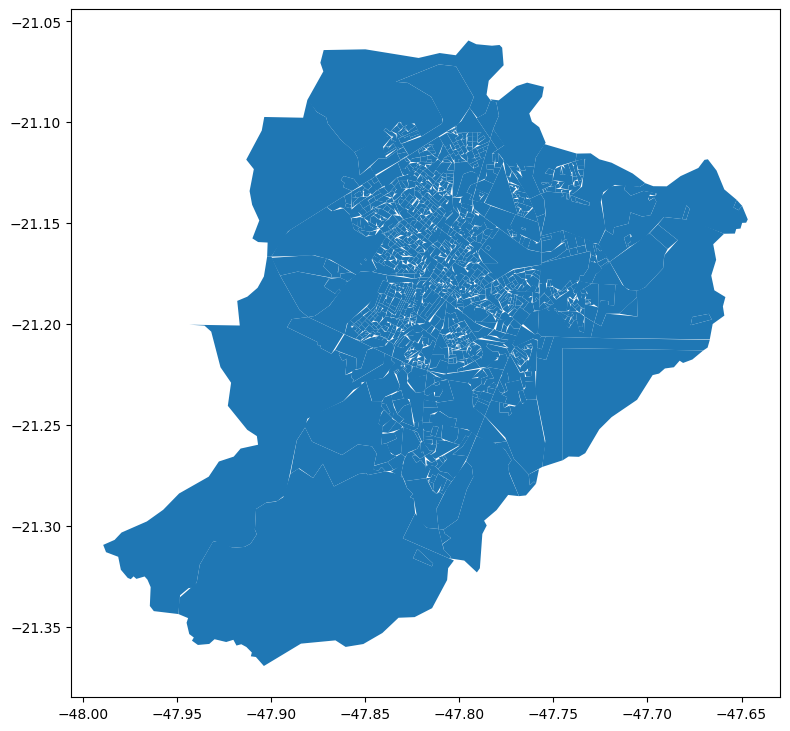

In [40]:
f, ax = plt.subplots(figsize=(8, 8))
setores_censitarios_ribeirao_preto_gdf.plot(ax=ax)
plt.tight_layout()
plt.show()

In [41]:
setores_censitarios_ribeirao_preto_gdf['zone'].unique()

array(['Área Urbana de Alta Densidade de Edificações',
       'Área Urbana de Baixa Densidade de Edificações', 'Núcleo Urbano',
       'Área Rural (exclusive aglomerados)'], dtype=object)

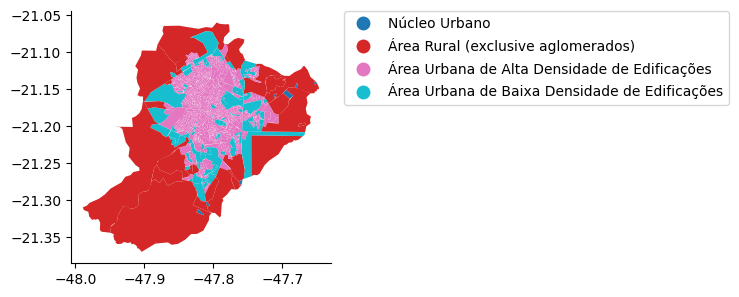

In [42]:
setores_censitarios_ribeirao_preto_gdf.plot(
    column='zone',
    legend=True,
    legend_kwds={
      'loc': 'upper left',
      'bbox_to_anchor' : (1.05, 1),
      'borderaxespad':0.
    }
)
sns.despine()
plt.tight_layout()
plt.show()

In [43]:
import geodatasets

In [44]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [45]:
usa = gpd.read_file(geodatasets.get_path('geoda.natregimes'))
usa.head(2)

REGIONS  NOSOUTH  POLY_ID               NAME  STATE_NAME STATE_FIPS  \
0      1.0      1.0        1  Lake of the Woods   Minnesota         27   
1      2.0      1.0        2              Ferry  Washington         53   

  CNTY_FIPS   FIPS  STFIPS  COFIPS  ...      GI59      GI69      GI79  \
0       077  27077      27      77  ...  0.285235  0.372336  0.342104   
1       019  53019      53      19  ...  0.256158  0.360665  0.361928   

       GI89       FH60  FH70       FH80       FH90  West  \
0  0.336455  11.279621   5.4   5.663881   9.515860     0   
1  0.360640  10.053476   2.6  10.079576  11.397059     1   

                                            geometry  
0  POLYGON ((-95.34258 48.5467, -95.34081 48.7151...  
1  POLYGON ((-118.8505 47.94969, -118.84732 48.47...  

[2 rows x 74 columns]

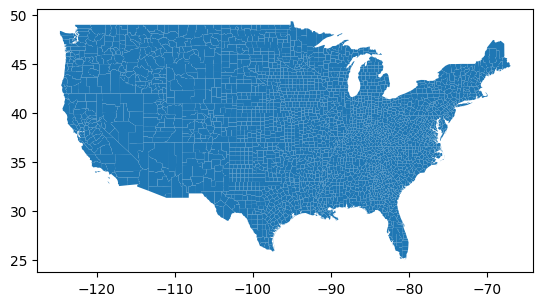

In [46]:
usa.plot();

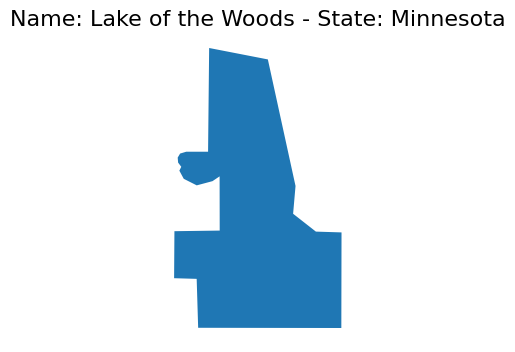

In [47]:
f, ax = plt.subplots(figsize=(4,4))
usa.iloc[[0]].plot(ax=ax)
plt.title(f'Name: {usa.iloc[0].NAME} - State: {usa.iloc[0].STATE_NAME}', fontsize=16)
ax.set_axis_off()
plt.show()

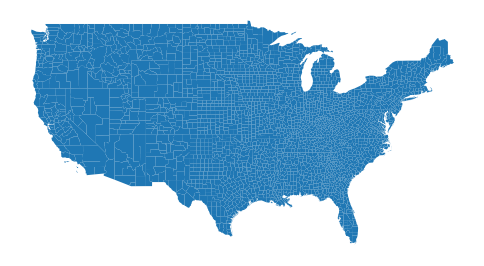

In [48]:
f, ax = plt.subplots(figsize = (6,6))
usa.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [49]:
airbnb = gpd.read_file(geodatasets.get_path('geoda.airbnb'))
airbnb.head(2)

community     shape_area      shape_len  AREAID  response_r   accept_r  \
0   DOUGLAS  46004621.1581  31027.0545098      35   98.771429  94.514286   
1   OAKLAND  16913961.0408  19565.5061533      36   99.200000  90.105263   

   rev_rating   price_pp  room_type  num_spots  ...  crowded  dependency  \
0   87.777778  78.157895   1.789474         38  ...      1.8        30.7   
1   88.812500  53.775000   1.850000         20  ...      1.3        40.4   

   without_hs  unemployed  income_pc  harship_in  num_crimes  num_theft  \
0        14.3        18.2      23791          47        5013       1241   
1        18.4        28.7      19252          78        1306        311   

   population                                           geometry  
0       18238  POLYGON ((-87.60914 41.84469, -87.60915 41.844...  
1        5918  POLYGON ((-87.59215 41.81693, -87.59231 41.816...  

[2 rows x 21 columns]

In [50]:
chicago_health = gpd.read_file(geodatasets.get_path('geoda.chicago_health'))
chicago_health.head(2)

ComAreaID community  TRACTCnt    shape_area     shape_len  Pop2012  \
0         35   DOUGLAS        10  4.600462e+07  31027.054510    18238   
1         36   OAKLAND         3  1.691396e+07  19565.506153     5918   

   Pop2014  PopChng  PopM    PopMP  ...  InfntMR  LungCancer  ProstateC  \
0    19430   3.1645  8294  42.6866  ...     13.4        74.5       85.5   
1     6473   4.4791  2499  38.6065  ...      8.2        54.5       54.2   

   Stroke  ChlBLLS  ChlLeadP  GonorrF  GonorrM  Tuberc  \
0    62.1    482.2         0   1063.3    727.4     4.2   
1    43.7    435.4         0   1655.4   1629.3     6.7   

                                            geometry  
0  POLYGON ((-87.60914 41.84469, -87.60915 41.844...  
1  POLYGON ((-87.59215 41.81693, -87.59231 41.816...  

[2 rows x 87 columns]

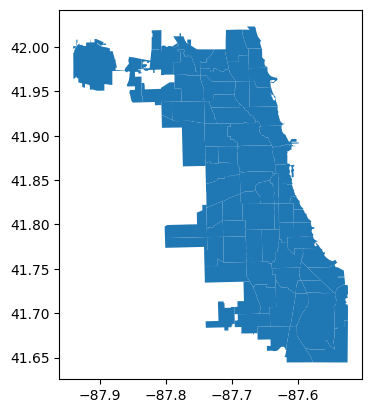

In [51]:
chicago_health.plot();

> Um GeoDataFrame **ainda é um DataFrame**, então temos todas as funcionalidades do pandas disponíveis para usar no conjunto de dados geoespaciais e para fazer manipulações de dados com os atributos e informações de geometria juntos.


# Sistemas de referência de coordenadas


Até agora, usamos os dados de geometria com certas coordenadas sem nos perguntarmos mais o que essas coordenadas significam ou como são expressas.

Ser capaz de se posicionar na Terra (e no universo) tem sido uma tarefa importante para os humanos há séculos. As informações espacialmente mais precisas sobre a localização de um objeto específico podem ser obtidas usando técnicas geodésicas.

Geodésia é a ciência que se concentra em medir e entender com precisão diferentes propriedades da Terra, como sua forma, orientação no espaço e gravidade. Ela também fornece vários métodos fundamentais que nos permitem localizar a nós mesmos ao usar serviços de navegação, ou fazer análise espacial com GIS de forma significativa.

> O **Sistema de Referência de Coordenadas (do inglês, *Coordinate Reference System - CRS* )** relaciona as coordenadas a um local específico na Terra.

Um CRS informa às ferramentas GIS como as coordenadas ou geometrias estão relacionadas aos lugares na Terra. Em princípio, cada conjunto de dados geográficos deve ter informações específicas relacionadas ao CRS anexadas a ele (se não, pode ser difícil ou impossível usar os dados em GIS). Esse tipo de informação adicional é chamado de metadados, porque fornece informações contextuais importantes sobre o conjunto de dados, como CRS ou o registro de data e hora em que os dados foram criados.

Que tipo de coisas são descritas com o Sistema de Referência de Coordenadas?

- Um CRS normalmente descreve os dados geográficos com três componentes principais: **datum**, **projeção de mapa** e **parâmetros adicionais**.



Esses componentes fornecem informações sobre como os dados geográficos podem ser vinculados à superfície da Terra:

1. **Datum:** Uma especificação de datum consiste em um modelo para o tamanho e a forma da Terra, como um elipsoide de referência ou um geoide, que descreve a superfície média do nível do mar da Terra. Um dos datums mais comumente usados ​​é o World Geodetic System (WGS84). O datum também contém informações sobre a origem do sistema de coordenadas, ou seja, o ponto de referência no qual o elipsoide/geoide está vinculado a um local conhecido na Terra. Isso é usado como referência para determinar a localização de outros pontos de controle que foram medidos com precisão a partir da origem. Os pontos de referência são úteis porque também podem ser usados ​​para verificar a precisão dos receptores GNSS/GPS. Finalmente, o datum inclui os parâmetros de orientação, que descrevem a orientação do sistema de coordenadas em relação à superfície da Terra. Eles contêm informações sobre a inclinação do eixo e a posição da origem em relação à superfície da Terra.

2. **Projeção do mapa:** A projeção define a transformação matemática usada para mapear a superfície da Terra em um plano bidimensional. Cada projeção tem seus próprios pontos fortes e fracos, e a escolha da projeção depende do uso pretendido do mapa e da área a ser mapeada (veja mais detalhes abaixo).

3. **Parâmetros adicionais:** Esses parâmetros definem informações adicionais necessárias para definir completamente o CRS, como o meridiano central, paralelo padrão e fator de escala. Esses parâmetros também podem incluir informações sobre a origem e orientação do sistema de coordenadas e a conversão entre as coordenadas projetadas e as coordenadas geográficas.


Para obter uma boa explicação detalhada, consulte https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

## Coordenadas geográficas

> Graus de latitude e longitude.
>
> Ex. 48 ° 51′N, 2 ° 17′E

O tipo de coordenadas mais conhecido são as coordenadas geográficas: definimos uma posição no globo em graus de latitude e longitude, em relação ao equador e ao meridiano principal.
Com este sistema, podemos facilmente especificar qualquer local na Terra. É amplamente utilizado, por exemplo em GPS. Se você inspecionar as coordenadas de um local no Google Maps, também verá a latitude e a longitude.

**Atenção!**

em Python usamos (lon, lat) e não (lat, lon)

- Longitude: [-180, 180] {{1}}
- Latitude: [-90, 90] {{1}}

## Projeções espaciais

> Coordenadas `(x, y)` são geralmente em metros ou pés

Embora a Terra seja um globo, na prática geralmente a representamos em uma superfície plana: pense em um mapa físico ou nas figuras que fizemos com Python na tela de nosso computador.
Ir do globo para um mapa plano é o que chamamos de *projeção*.

Projetamos a superfície da Terra em um plano 2D para que possamos expressar localizações em coordenadas cartesianas \$x$ e \$y$, em uma superfície plana. Nesse plano, normalmente trabalhamos com uma unidade de comprimento, como metros em vez de graus, o que torna a análise mais conveniente e eficaz.

No entanto, há uma observação importante: a Terra tridimensional nunca pode ser representada perfeitamente em um mapa bidimensional, então as projeções inevitavelmente introduzem distorções. Para minimizar esses erros, existem diferentes projeções, cada uma com vantagens e desvantagens específicas.



A escolha de uma projeção deve se basear na precisão desejada, no impacto sobre o que se pretende analisar e no tipo de dado disponível. Diferentes projeções de mapas que podem ser usadas para representar dados geográficos em um plano bidimensional.

<img src="https://pythongis.org/_images/projections.png" width="60%"/>

Para este minicurso, utilizaremos $\verb!latlong!$ e $\verb!utm!$ para projeções; $\verb!WGS84!$ e $\verb!GRS80!$ para elipses; e $\verb!WGS84!$, utilizado pelos sistemas de GPS e $\verb!SIRGAS2000!$, oficialmente utilizado pelo Brasil (pois é a melhor representação da América Latina).


## CRS Python / GeoPandas

Um GeoDataFrame ou GeoSeries tem um atributo `.crs` que contém (opcionalmente) uma descrição do sistema de referência de coordenadas das geometrias.

In [52]:
bairros_rp.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [53]:
padarias_rp_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

O atributo `.crs` é fornecido como um dicionário. Nesse caso, indica apenas o código EPSG, mas também pode conter a string "proj4" completa (na forma de dicionário).

Possível representação CRS:

- **string `proj4`**
  
   Exemplo: `+ proj = longlat + datum = WGS84 + no_defs`

   Ou sua representação dict: `{'proj': 'longlat', 'datum': 'WGS84', 'no_defs': True}`

- **código EPSG**
  
   Exemplo: `EPSG: 4326` = WGS84 geográfico CRS (longitude, latitude)

Veja, por exemplo, https://epsg.io/4326

Por dentro, o GeoPandas usa as bibliotecas `pyproj`/` PROJ` para lidar com as reprojeções.

Para obter mais informações, consulte http://geopandas.readthedocs.io/en/latest/projections.html.

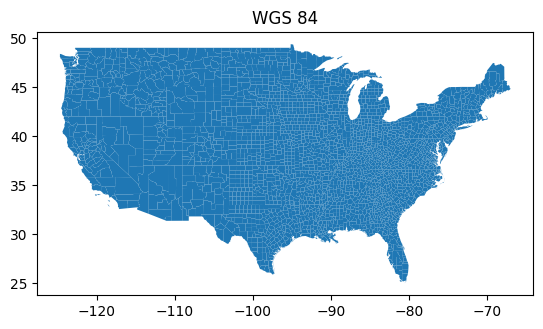

In [54]:
ax = usa.plot()
ax.set_title(usa.crs.name);

In [55]:
usa = usa.to_crs("ESRI:102003")
usa.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: USA_Contiguous_Albers_Equal_Area_Conic
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

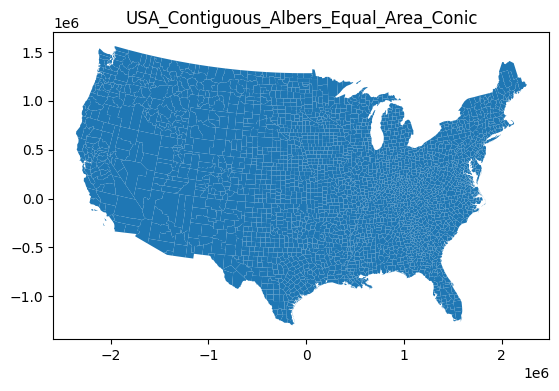

In [56]:
ax = usa.plot()
ax.set_title(usa.crs.name);

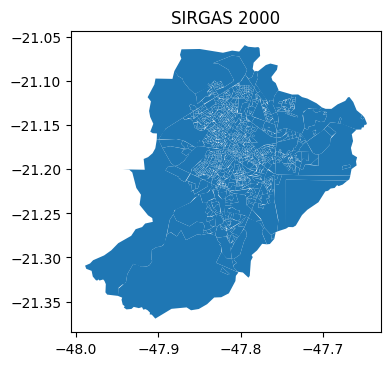

In [57]:
ax = setores_censitarios_ribeirao_preto_gdf.plot(figsize=(4,4))
ax.set_title(setores_censitarios_ribeirao_preto_gdf.crs.name);

## Reprojeção do CRS para projeção Mercator.

Podemos converter um GeoDataFrame para outro sistema de referência usando a função `to_crs`.

Por exemplo, vamos converter para a projeção UTM Zona 22S Mercator (https://epsg.io/32722):

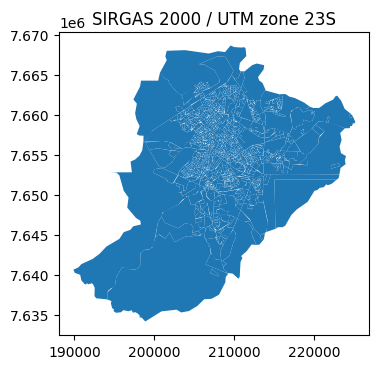

In [58]:
setores_censitarios_ribeirao_preto_gdf_utm = (
    setores_censitarios_ribeirao_preto_gdf.to_crs('EPSG:31983')
)

f, ax = plt.subplots(figsize=(4,4))
setores_censitarios_ribeirao_preto_gdf_utm.plot(ax=ax)
ax.set_title(setores_censitarios_ribeirao_preto_gdf_utm.crs.name)
plt.show()

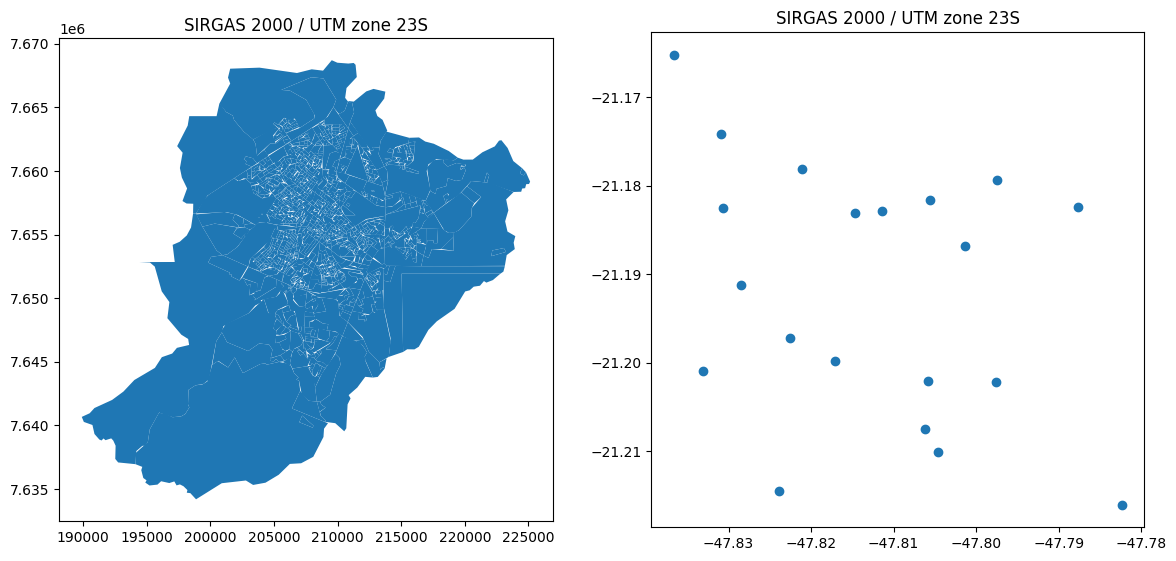

In [59]:
f, ax = plt.subplots(1, 2, figsize=(14, 14))

for i, df in enumerate([setores_censitarios_ribeirao_preto_gdf_utm, padarias_rp_gdf]):
    df.plot(ax=ax[i])
    ax[i].set_title(setores_censitarios_ribeirao_preto_gdf_utm.crs.name)

plt.show()

### Por que usar um CRS diferente?


Às vezes, há boas razões para você querer alterar o sistema de referências de coordenadas do seu conjunto de dados, por exemplo:

- Fontes diferentes com CRS diferentes -> necessidade de converter para o mesmo crs

     ```python
    df1 = geopandas.read_file(...)
    df2 = geopandas.read_file(...)

    df2 = df2.to_crs(df1.crs)
    ```

- Mapeamento (distorção de forma e distâncias)

- Cálculos baseados em distância / área -> certifique-se de usar um sistema de coordenadas projetadas apropriado expresso em uma unidade significativa, como metros ou pés (não graus).

<div class = "alert alert-info">

**ATENÇÃO:**

Todos os cálculos que acontecem no geopandas e na lib shapely assumem que seus dados estão em um plano cartesiano 2D, e assim o resultado desses cálculos só estará correto se seus dados forem devidamente projetados.

</div>

In [60]:
##Gerando a area dos setores censitarios de Sanca a partir da projecao UTM
setores_censitarios_ribeirao_preto_gdf_utm['area_utm'] = setores_censitarios_ribeirao_preto_gdf_utm.geometry.area
setores_censitarios_ribeirao_preto_gdf_utm.head(2)

code_tract                                          zone  code_muni  \
52421  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   
52422  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   

            name_muni  code_subdistrict name_subdistrict  code_district  \
52421  Ribeirão Preto      3.543402e+10             None    354340205.0   
52422  Ribeirão Preto      3.543402e+10             None    354340205.0   

        name_district  code_state abbrev_state name_state  \
52421  Ribeirão Preto        35.0           SP  São Paulo   
52422  Ribeirão Preto        35.0           SP  São Paulo   

                                                geometry      area_utm  
52421  MULTIPOLYGON (((208819.839 7654823.439, 208759...  20967.357007  
52422  MULTIPOLYGON (((208594.376 7654869.161, 208759...  26334.618904

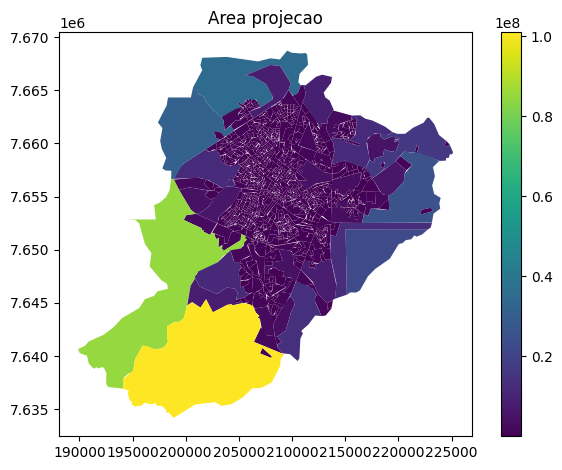

In [61]:
f, ax = plt.subplots()
setores_censitarios_ribeirao_preto_gdf_utm.plot('area_utm',legend=True, ax=ax)
ax.set_title('Area projecao')
plt.tight_layout()
plt.show()

# Operações geométricas comuns

Operações geométricas referem-se a um conjunto de métodos que podem ser usados para processar e analisar características geométricas, como pontos, linhas e polígonos. No contexto da análise de dados geoespaciais, essas operações nos permitem, por exemplo, fazer perguntas sobre como dois ou mais objetos geográficos se relacionam entre si: eles se cruzam, se tocam ou se sobrepõem? Eles são adjacentes um ao outro? Quão distantes estão?

Um aspecto importante dos dados geoespaciais é que podemos olhar para *relações espaciais*: como dois objetos espaciais se relacionam (se eles se sobrepõem, se cruzam, se contêm um ao outro, por exemplo).

As relações topológicas e teóricas de conjuntos em GIS são normalmente baseadas no modelo DE-9IM. Consulte https://en.wikipedia.org/wiki/Spatial_relation para obter mais informações.


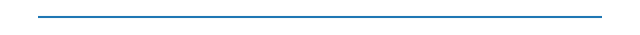

In [62]:
line = LineString([(0, 1), (4, 1)])

ax = gpd.GeoSeries(line).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

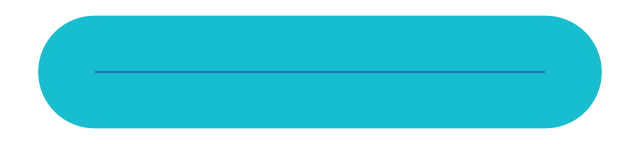

In [63]:
dilated = line.buffer(0.5)

ax = gpd.GeoSeries([line, dilated]).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

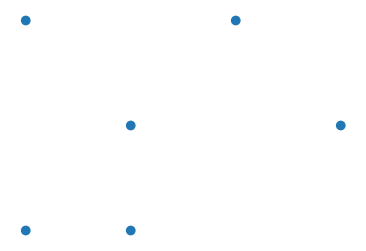

In [64]:
p1 =  MultiPoint([(0, 0), (0, 2), (1, 0), (1, 1), (2, 2), (3, 1)])

ax = gpd.GeoSeries(p1).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

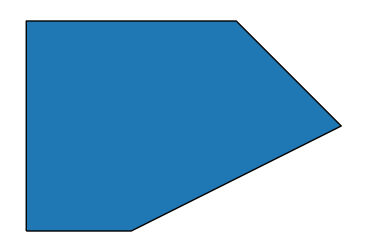

In [65]:
ax = gpd.GeoSeries(p1).convex_hull.plot(edgecolor='black', cmap="tab10", figsize=(8,3))
ax.set_axis_off();

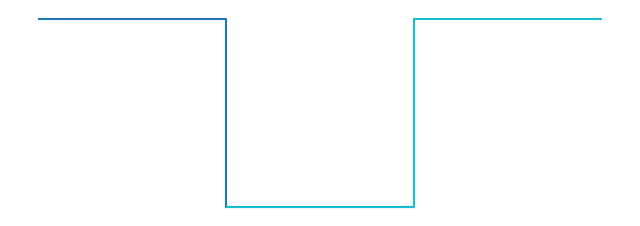

In [66]:
line1 = LineString([(1, 2), (2, 2), (2, 1), (3, 1)])
line2 = LineString([(2, 1), (3, 1), (3, 2), (4, 2)])

ax = gpd.GeoSeries([line1, line2]).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

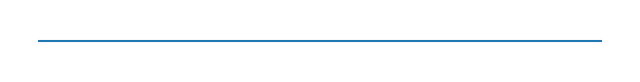

In [67]:
intersect = line1.intersection(line2)

ax = gpd.GeoSeries(intersect).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

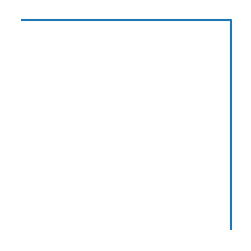

In [68]:
diferent = line1.difference(line2)

ax = gpd.GeoSeries(diferent).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

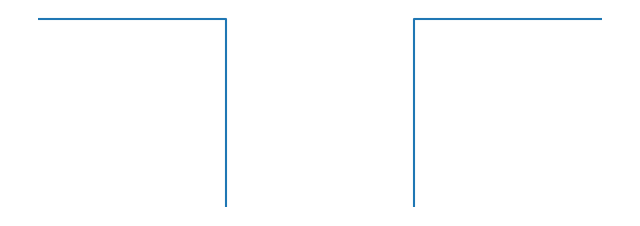

In [69]:
sym_difference = line1.symmetric_difference(line2)

ax = gpd.GeoSeries(sym_difference).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

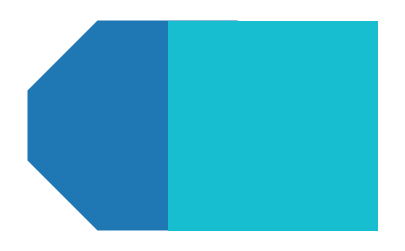

In [70]:
p1 = Polygon([(2, 1), (1, 2), (1, 3), (2, 4), (4, 4), (5, 3), (5, 2), (4, 1)])
p2 = Polygon([(3, 1), (6, 1), (6, 4), (3, 4)])

ax = gpd.GeoSeries([p1, p2]).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

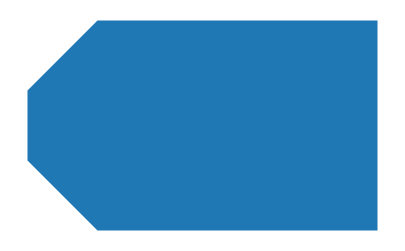

In [71]:
union = p1.union(p2)

ax = gpd.GeoSeries(union).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

## Spatial Joins

In [72]:
setores_padarias = setores_censitarios_ribeirao_preto_gdf.sjoin(padarias_rp_gdf, how='inner')
setores_padarias.head()

code_tract                                          zone  code_muni  \
52427  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   
52437  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   
52446  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   
52483  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   
52510  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   

            name_muni  code_subdistrict name_subdistrict  code_district  \
52427  Ribeirão Preto      3.543402e+10             None    354340205.0   
52437  Ribeirão Preto      3.543402e+10             None    354340205.0   
52446  Ribeirão Preto      3.543402e+10             None    354340205.0   
52483  Ribeirão Preto      3.543402e+10             None    354340205.0   
52510  Ribeirão Preto      3.543402e+10             None    354340205.0   

        name_district  code_state abbrev_state  ...  \
52427  Ribeirão Preto        35.0           SP  ...   
52437  Ribeirão Preto        35.0           SP  ...   
52446  Ribeirão Preto        35.0           SP  ...   
52483  Ribeirão Preto        35.0           SP  ...   
52510  Ribeirão Preto        35.0           SP  ...   

                          Place Id                          Kgmid  \
52427  ChIJN2cPVeK-uZQRl-nAVHR8WC0  *** Visible after upgrade ***   
52437  ChIJc4aCQuW-uZQRP5Ai5_T7e1o  *** Visible after upgrade ***   
52446  ChIJyckxmxu_uZQR7bPme-8C8g4  *** Visible after upgrade ***   
52483  ChIJjWTwwO--uZQRaZ8dkDy2pEI  *** Visible after upgrade ***   
52510  ChIJ1RQ6bCy_uZQRk_aAB_lqzcw  *** Visible after upgrade ***   

                           Plus code           Google Knowledge URL  \
52427  *** Visible after upgrade ***  *** Visible after upgrade ***   
52437  *** Visible after upgrade ***  *** Visible after upgrade ***   
52446  *** Visible after upgrade ***  *** Visible after upgrade ***   
52483  *** Visible after upgrade ***  *** Visible after upgrade ***   
52510  *** Visible after upgrade ***  *** Visible after upgrade ***   

                               Email                  Social Medias  \
52427  *** Visible after upgrade ***  *** Visible after upgrade ***   
52437  *** Visible after upgrade ***  *** Visible after upgrade ***   
52446  *** Visible after upgrade ***  *** Visible after upgrade ***   
52483  *** Visible after upgrade ***  *** Visible after upgrade ***   
52510  *** Visible after upgrade ***  *** Visible after upgrade ***   

                            Facebook                      Instagram  \
52427  *** Visible after upgrade ***  *** Visible after upgrade ***   
52437  *** Visible after upgrade ***  *** Visible after upgrade ***   
52446  *** Visible after upgrade ***  *** Visible after upgrade ***   
52483  *** Visible after upgrade ***  *** Visible after upgrade ***   
52510  *** Visible after upgrade ***  *** Visible after upgrade ***   

                             Twitter                           Yelp  
52427  *** Visible after upgrade ***  *** Visible after upgrade ***  
52437  *** Visible after upgrade ***  *** Visible after upgrade ***  
52446  *** Visible after upgrade ***  *** Visible after upgrade ***  
52483  *** Visible after upgrade ***  *** Visible after upgrade ***  
52510  *** Visible after upgrade ***  *** Visible after upgrade ***  

[5 rows x 42 columns]

In [73]:
setores_padarias = setores_padarias.groupby('geometry')[['code_tract']].count().reset_index()
type(setores_padarias)

pandas.core.frame.DataFrame

In [74]:
setores_padarias.sort_values(by='code_tract').head()

geometry  code_tract
0  MULTIPOLYGON (((-47.82192 -21.21344, -47.82397...           1
1  MULTIPOLYGON (((-47.81598 -21.19884, -47.81463...           1
2  MULTIPOLYGON (((-47.82112 -21.19578, -47.81799...           1
3  MULTIPOLYGON (((-47.83151 -21.19757, -47.82994...           1
4  MULTIPOLYGON (((-47.82747 -21.18944, -47.82659...           1

[]

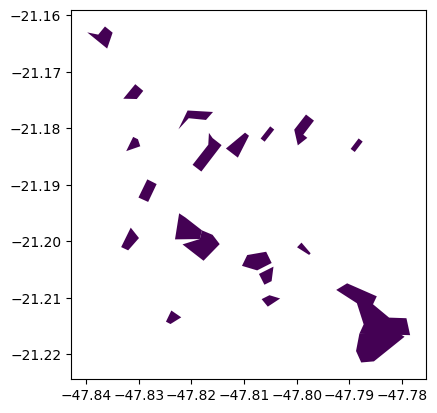

In [75]:
setores_padarias = gpd.GeoDataFrame(setores_padarias)
setores_padarias.plot('code_tract')
plt.plot()

In [76]:
## Pontos de ônibus de RB
## setore censitarios: 'Área Urbana de Alta Densidade de Edificações'
pontos_onibus_rb_gdf = gpd.read_file('pontos_onibus_rb.zip')
pontos_onibus_rb_gdf.head(2)

codigo codigosis  logradour numeroimo  denominac  \
0   Ponto 595      None  R. PiauÃ­      3036  R. PiauÃ­   
1  Ponto 3479      None  R. Javari      4891  R. Javari   

                                           referenci  tipoped tipoabrig  \
0             Entre Rua Araguaia e Rua Rio Trombetas  Ãnibus      None   
1  entre R. AntÃ´nio dos Santos Marques e R. Vice...  Ãnibus      None   

  temalarme   statusmap                datacriac pontorefe  \
0     false  1 - Criado  2013-04-01 15:30:38.005      None   
1      None  1 - Criado  2015-02-23 14:35:06.464      None   

                                           geom31983  \
0  SRID=31983;POINT(208305.534855978 7659827.6379...   
1  SRID=31983;POINT(208376.196461934 7661589.2925...   

                                            the_geom  \
0  SRID=4326;POINT(-47.808457144133 -21.139555173...   
1  SRID=4326;POINT(-47.807477833883 -21.123668213...   

                                 globalid created_us created_da last_edite  \
0  {9990B409-12AE-4E4F-B280-CA9878A850EC}       None        NaT       None   
1  {A3C72BDD-0D96-4DC9-960A-A4FF3B8F6EEA}       None        NaT       None   

  last_edi_1                        geometry  
0        NaT  POINT (208305.535 7659827.638)  
1        NaT  POINT (208376.196 7661589.293)

In [77]:
pontos_onibus_rb_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   codigo      3066 non-null   object        
 1   codigosis   0 non-null      object        
 2   logradour   3066 non-null   object        
 3   numeroimo   3024 non-null   object        
 4   denominac   2821 non-null   object        
 5   referenci   3058 non-null   object        
 6   tipoped     3066 non-null   object        
 7   tipoabrig   881 non-null    object        
 8   temalarme   2801 non-null   object        
 9   statusmap   2747 non-null   object        
 10  datacriac   3066 non-null   object        
 11  pontorefe   1405 non-null   object        
 12  geom31983   3066 non-null   object        
 13  the_geom    3066 non-null   object        
 14  globalid    3066 non-null   object        
 15  created_us  0 non-null      object        
 16  created_da  0 no

<Axes: >

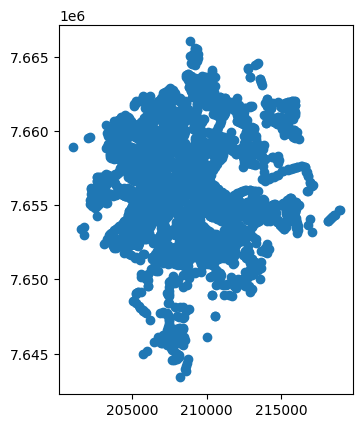

In [78]:
pontos_onibus_rb_gdf.plot()

In [79]:
pontos_onibus_rb_gdf.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [80]:
setores_censitarios_rb_urbano = setores_censitarios_ribeirao_preto_gdf_utm.query("zone == 'Área Urbana de Alta Densidade de Edificações'")
setores_censitarios_rb_urbano.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

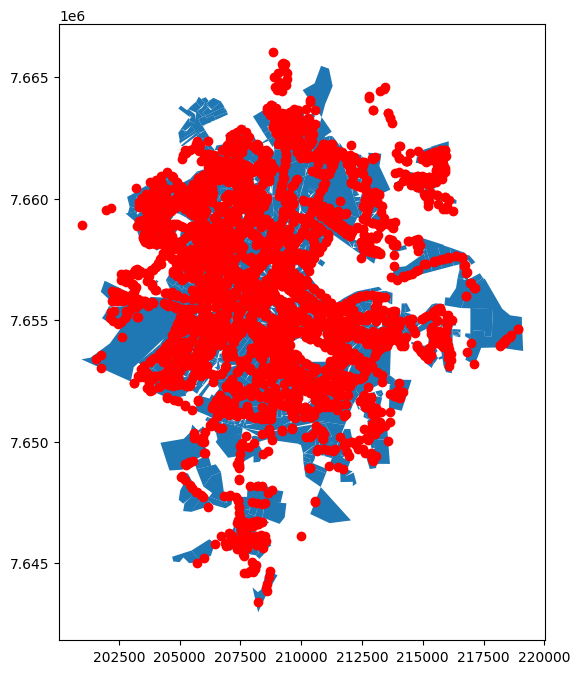

In [81]:
f, ax = plt.subplots(figsize=(8, 8))
setores_censitarios_rb_urbano.plot(ax=ax)
pontos_onibus_rb_gdf.plot(ax=ax, color='red')
plt.show()

In [82]:
##Determinando os setores censitários de Ribeirão Preto com o maior número de pontos de ônibus
setores_pontos_onibus = setores_censitarios_rb_urbano.sjoin(pontos_onibus_rb_gdf, how='left')
setores_pontos_onibus.head(2)

code_tract                                          zone  code_muni  \
52421  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   
52422  3.543402e+14  Área Urbana de Alta Densidade de Edificações  3543402.0   

            name_muni  code_subdistrict name_subdistrict  code_district  \
52421  Ribeirão Preto      3.543402e+10             None    354340205.0   
52422  Ribeirão Preto      3.543402e+10             None    354340205.0   

        name_district  code_state abbrev_state  ...   statusmap  \
52421  Ribeirão Preto        35.0           SP  ...  1 - Criado   
52422  Ribeirão Preto        35.0           SP  ...         NaN   

                     datacriac             pontorefe  \
52421  2013-04-01 15:30:37.956  Indep. c/ Fco. Junq.   
52422                      NaN                   NaN   

                                               geom31983  \
52421  SRID=31983;POINT(208765.636110329 7654766.0927...   
52422                                                NaN   

                                                the_geom  \
52421  SRID=4326;POINT(-47.804892461375 -21.185306993...   
52422                                                NaN   

                                     globalid created_us created_da  \
52421  {97A6A5B5-EDD0-434A-B017-59EE495AE4DB}       None        NaT   
52422                                     NaN        NaN        NaT   

      last_edite last_edi_1  
52421       None        NaT  
52422        NaN        NaT  

[2 rows x 33 columns]

In [83]:
setores_pontos_onibus = setores_pontos_onibus.groupby('geometry')[['code_tract']].count().reset_index()
setores_pontos_onibus.head(2)

geometry  code_tract
0  MULTIPOLYGON (((205942.783 7647743.708, 205476...           1
1  MULTIPOLYGON (((205322.954 7648302.061, 205719...           2

[]

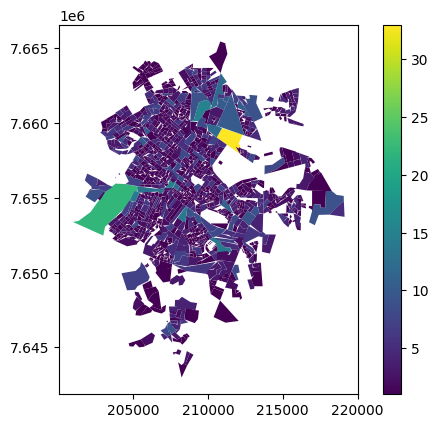

In [84]:
setores_pontos_onibus_gdf = gpd.GeoDataFrame(setores_pontos_onibus, crs=setores_censitarios_ribeirao_preto_gdf_utm.crs)
setores_pontos_onibus_gdf.plot('code_tract',legend=True)
plt.plot()

In [85]:
# Pontos de onibus por bairros
bairros_rp.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [86]:
## convertendo o gdf dos bairros para UTM
bairros_rp_gdf_utm = (
    bairros_rp.to_crs('EPSG:31983')
)

bairros_rp_gdf_utm.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [87]:
bairros_rp_gdf_utm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 55 entries, 1455 to 1509
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CD_REGIAO   55 non-null     object  
 1   NM_REGIAO   55 non-null     object  
 2   CD_UF       55 non-null     object  
 3   NM_UF       55 non-null     object  
 4   CD_MUN      55 non-null     object  
 5   NM_MUN      55 non-null     object  
 6   CD_DIST     55 non-null     object  
 7   NM_DIST     55 non-null     object  
 8   CD_SUBDIST  55 non-null     object  
 9   NM_SUBDIST  0 non-null      object  
 10  CD_BAIRRO   55 non-null     object  
 11  NM_BAIRRO   55 non-null     object  
 12  CD_RGINT    55 non-null     object  
 13  NM_RGINT    55 non-null     object  
 14  CD_RGI      55 non-null     object  
 15  NM_RGI      55 non-null     object  
 16  CD_CONCURB  55 non-null     object  
 17  NM_CONCURB  55 non-null     object  
 18  geometry    55 non-null     geometry
dtypes:

In [88]:
bairros_rp_gdf_utm.head(2)

CD_REGIAO NM_REGIAO CD_UF      NM_UF   CD_MUN          NM_MUN    CD_DIST  \
1455         3   Sudeste    35  São Paulo  3543402  Ribeirão Preto  354340205   
1456         3   Sudeste    35  São Paulo  3543402  Ribeirão Preto  354340205   

             NM_DIST   CD_SUBDIST NM_SUBDIST   CD_BAIRRO  \
1455  Ribeirão Preto  35434020500       None  3543402027   
1456  Ribeirão Preto  35434020500       None  3543402003   

                     NM_BAIRRO CD_RGINT        NM_RGINT  CD_RGI  \
1455    Subsetor Sul - 4 (S-4)     3508  Ribeirão Preto  350031   
1456  Subsetor Norte - 2 (N-2)     3508  Ribeirão Preto  350031   

              NM_RGI CD_CONCURB         NM_CONCURB  \
1455  Ribeirão Preto    3543402  Ribeirão Preto/SP   
1456  Ribeirão Preto    3543402  Ribeirão Preto/SP   

                                               geometry  
1455  POLYGON ((207792.093 7651436.546, 207787.856 7...  
1456  POLYGON ((207246.868 7658520.446, 207164.377 7...

In [89]:
bairros_pontos_onibus = bairros_rp_gdf_utm.sjoin(pontos_onibus_rb_gdf, how='left')
bairros_pontos_onibus = bairros_pontos_onibus.groupby('geometry')[['CD_BAIRRO', 'globalid']].count().reset_index()
bairros_pontos_onibus.head(2)

geometry  CD_BAIRRO  globalid
0  POLYGON ((202754.551 7651485.27, 202758.395 76...          1         1
1  POLYGON ((204569.099 7653034.117, 204572.341 7...         32        32

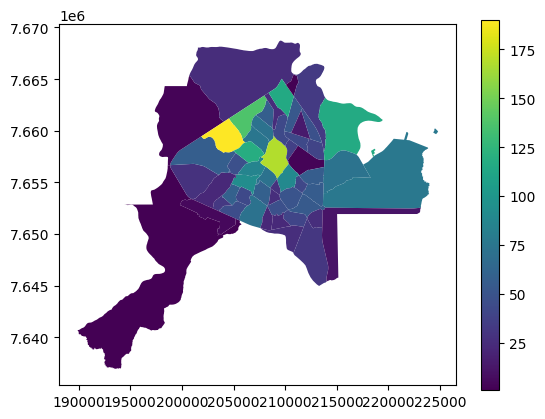

In [90]:
bairros_pontos_onibus_gdf = gpd.GeoDataFrame(bairros_pontos_onibus, crs=bairros_rp_gdf_utm.crs)
bairros_pontos_onibus_gdf.plot('CD_BAIRRO',legend=True)
plt.plot();

<div class = "alert alert-info">

**REFERÊNCIA**:

Visão geral das diferentes funções para verificar as relações espaciais (* funções de predicado espacial *):

* `equals`
* `contains`
* `crosses`
* `disjoint`
* `intersects`
* `overlaps`
* `touches`
* `within`
* `covers`


Consulte https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships para uma visão geral desses métodos.

Consulte https://en.wikipedia.org/wiki/DE-9IM para todos os detalhes sobre a semântica dessas operações.

</div>

# Visualização de dados geoespaciais

## Mapas estáticos

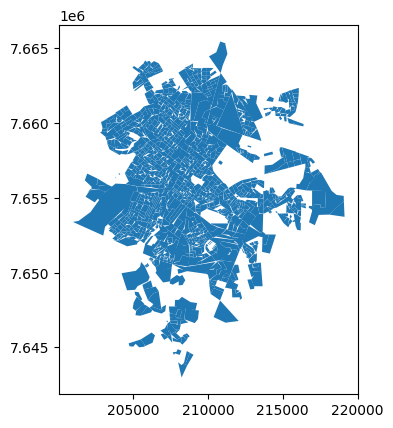

In [91]:
setores_censitarios_rb_urbano.plot();

### Ajustando o tamanho da imagem

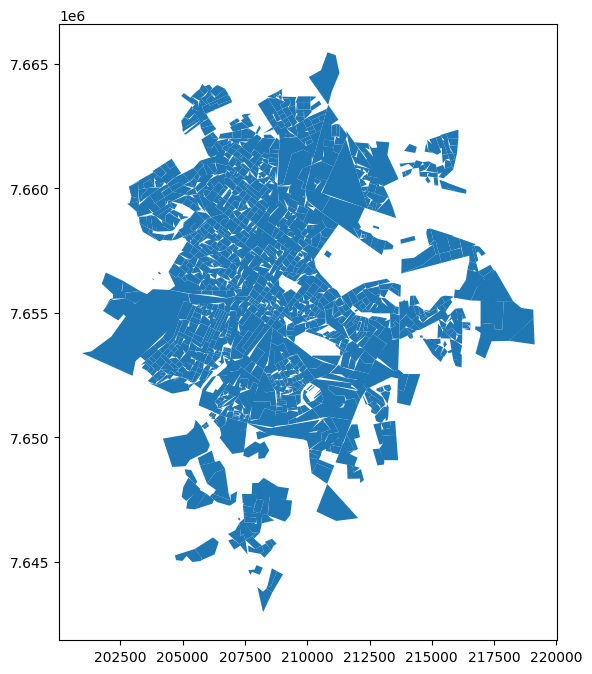

In [92]:
setores_censitarios_rb_urbano.plot(figsize=(18, 8));

### Removendo o box de labels das coordenadas

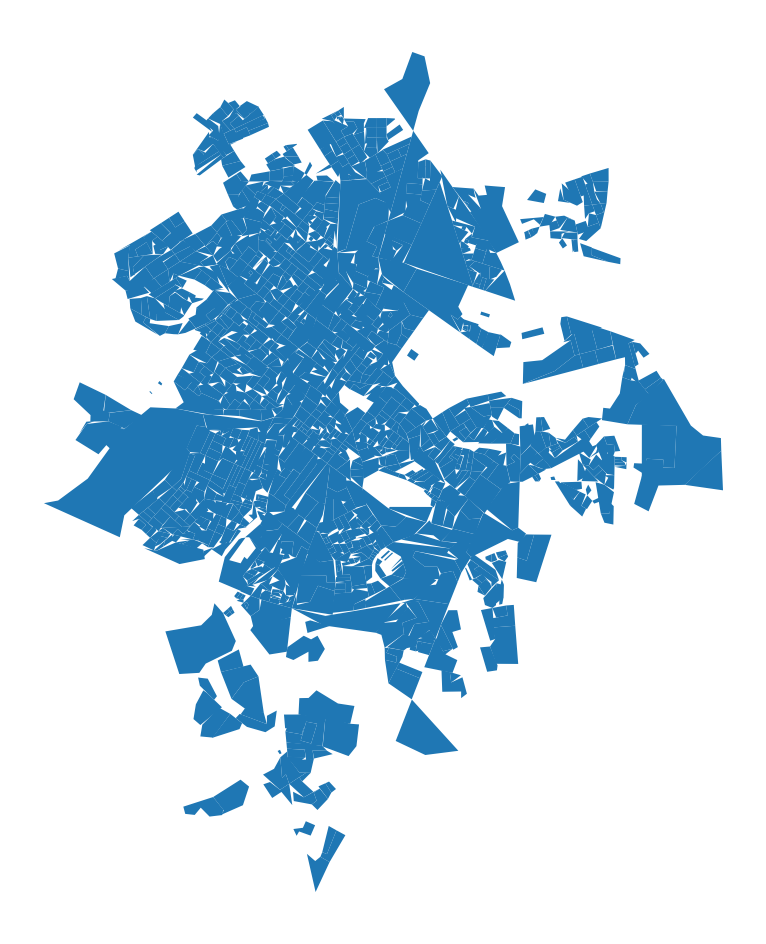

In [93]:
ax = setores_censitarios_rb_urbano.plot(figsize=(12, 12))
ax.set_axis_off()

### Colorindo baseado em uma coluna

Vamos primeiro criar uma nova coluna com a área de cada setor censitários:

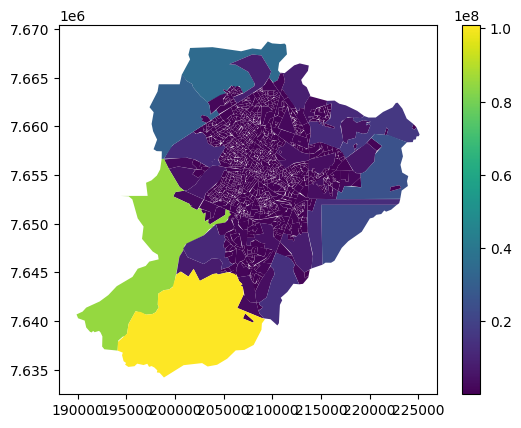

In [94]:
setores_censitarios_ribeirao_preto_gdf_utm.plot('area_utm', legend=True)
plt.show()

### Combinando diferentes dataframes em um único gráfico

O método `.plot` retorna um objeto matplotlib Axes, que pode então ser reutilizado para adicionar camadas adicionais ao gráfico com a palavra-chave `ax`:

Como exemplo, vamos determinar os centróides dos setores censitários urbanos de Teresina e *plotá-los* no mesmo mapa.

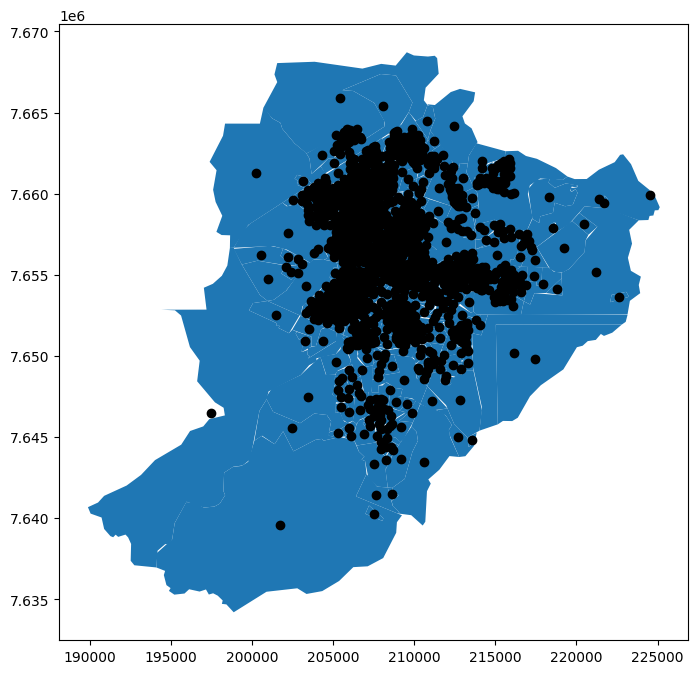

In [95]:
setores_censitarios_ribeirao_preto_gdf_utm['centroid'] = (
    setores_censitarios_ribeirao_preto_gdf_utm['geometry'].centroid
)
ax = setores_censitarios_ribeirao_preto_gdf_utm['geometry'].plot(figsize=(18,8))
setores_censitarios_ribeirao_preto_gdf_utm['centroid'].plot(ax=ax, color="black");

## Mapas interativos

Outra forma de visualização de dados geoespaciais é através de bibliotecas de visualizações de mapas interativos baseadas na web. Existem várias bibliotecas com essa finalidade.

Utilizaremos a biblioteca Folium, uma biblioteca Python que possibilita a visualização geográfica interativa de dados espaciais através do \$Leaflet.js.
> *Leaflet.js* é uma biblioteca JavaScript de código aberto usada para construir mapas interativos e *mobile-friendly*. Ela utiliza dados do *OpenStreetMaps* para construir a projeção de mapas detalhados contendo informações de vias e demarcações de locais e transportes públicos

In [96]:
import folium

Criando um mapa interativo com o *folium*

In [97]:
mapa_df = folium.Map(
  location=[-21.187, -47.834],
  zoom_start = 14,
)
mapa_df

#### Adicionando um **Marker**

In [98]:
usp = [-21.16572073443314, -47.85431821188052]
fatec = [-21.186707490123165, -47.8336879796653]
uniter = [-21.198504185941, -47.81769896448506]

In [99]:
mapa_df = folium.Map(
  location=[-21.187, -47.834],
  zoom_start = 12,
)

folium.Marker(
  usp, popup="<i>USP</i>"
).add_to(mapa_df)

folium.Marker(
  fatec, popup="<i>FATEC</i>"
).add_to(mapa_df)

folium.Marker(
  uniter, popup="<i>UNITER</i>"
).add_to(mapa_df)

mapa_df

#### **Markers** personalizados

In [100]:
# https://fontawesome.com/icons?d=gallery

mapa_df = folium.Map(
  location=[-21.187, -47.834],
  zoom_start = 12,
)

folium.Marker(
  usp, popup="<i>USP</i>", icon=folium.Icon(color="red", prefix='fa',icon='building')
).add_to(mapa_df)

folium.Marker(
  fatec, popup="<i>USP</i>", icon=folium.Icon(color="green", prefix='fa',icon='landmark')
).add_to(mapa_df)

folium.Marker(
  uniter, popup="<i>UNITER</i>",
  icon=folium.Icon(color="blue", prefix='fa',icon='house')
).add_to(mapa_df)

mapa_df

### Adicionando outras visualizações de mapas

In [101]:
mapa_df = folium.Map(
  location=[-21.187, -47.834],
  zoom_start = 12,
)

folium.TileLayer('cartodbpositron').add_to(mapa_df)
folium.TileLayer('OpenTopoMap').add_to(mapa_df)

#tile custon 1
attr = (
    'contributors, &copy; <a href="https://github.com/cyclosm/cyclosm-cartocss-style/releases" title="CyclOSM - Open Bicycle render">CyclOSM</a>',
    '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> '
)
tiles = 'https://{s}.tile-cyclosm.openstreetmap.fr/cyclosm/{z}/{x}/{y}.png'
folium.TileLayer(name='cyclosm - custon', tiles=tiles, attr=attr).add_to(mapa_df)


#tile custon 2
attr_2 = (
    'Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community'
)
tiles_2 = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'
folium.TileLayer(name='custon 2', tiles=tiles_2, attr=attr_2).add_to(mapa_df)

#tile custon google
attr_google = (
    'Google Maps &copy;',
    '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> '
)
tiles_google = 'http://mt1.google.com/vt?lyrs=m&x={x}&y={y}&z={z}'
folium.TileLayer(name='custon 3 - Google', tiles=tiles_google, attr=attr_google).add_to(mapa_df)

#tile custon google
attr_google_2 = (
    'Google Maps &copy;',
    '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> '
)
tiles_google_2 = 'http://mt1.google.com/vt?lyrs=s,h&x={x}&y={y}&z={z}'
folium.TileLayer(name='custon 3 - Google Hybrid', tiles=tiles_google_2, attr=attr_google_2).add_to(mapa_df)



folium.LayerControl(collapsed=False).add_to(mapa_df)

mapa_df

<Axes: >

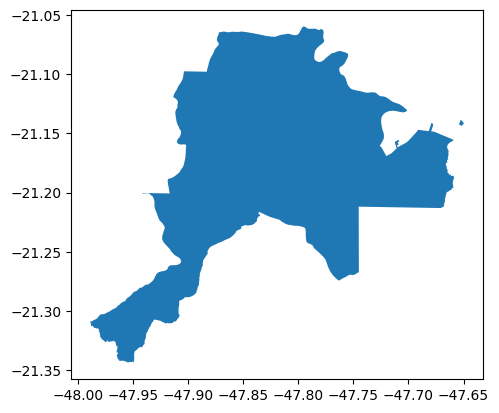

In [102]:
area_bairros_rp = bairros_rp.dissolve()
area_bairros_rp.plot()

In [103]:
#Limites do municipio
area_bairros_rp.bounds

minx       miny       maxx       maxy
0 -47.989154 -21.343679 -47.649695 -21.059503

### Criando pontos aleatórios

In [104]:
import random

minx, miny, maxx, maxy = area_bairros_rp.bounds.iloc[0]

cont = 0
colecao_de_pontos = []

while cont < 200:
    p = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
    if area_bairros_rp.contains(p).iloc[0]:
        colecao_de_pontos.append({
            'latlong': (p.y, p.x),
            'geometry': p
        })
        cont += 1

pontos_aleatorios = gpd.GeoDataFrame(colecao_de_pontos, crs = area_bairros_rp.crs)
pontos_aleatorios.head()

latlong                     geometry
0    (-21.20963561464668, -47.66968186973968)  POINT (-47.66968 -21.20964)
1  (-21.117280117168313, -47.783048937735465)  POINT (-47.78305 -21.11728)
2    (-21.11664477986616, -47.90479422477063)  POINT (-47.90479 -21.11664)
3    (-21.098500606927352, -47.8790783485661)   POINT (-47.87908 -21.0985)
4   (-21.069881468164102, -47.81961263382558)  POINT (-47.81961 -21.06988)

### Adicionando esse conjunto de pontos em um mapa interativo

In [105]:
mapa_df = folium.Map(
  location=[-21.187, -47.834],
  zoom_start = 12,
)

folium.GeoJson(
    pontos_aleatorios,
    marker= folium.Marker(
        icon=folium.Icon(
            color="black",
            prefix='fa',
            icon='bug'
        )
    )
).add_to(mapa_df)

mapa_df

### Agrupando *markers*

In [106]:
from folium.plugins import MarkerCluster

mapa_df = folium.Map(
  location=[-21.187, -47.834],
  zoom_start = 12,
)

marker_cluster = MarkerCluster().add_to(mapa_df)

folium.GeoJson(
    pontos_aleatorios,
    marker= folium.Marker(
        icon=folium.Icon(
            color="black",
            prefix='fa',
            icon='fire'
        )
    )
).add_to(marker_cluster)

mapa_df

### *HeatMaps*

In [107]:
from folium.plugins import HeatMap

mapa_df = folium.Map(
  location=[-21.187, -47.834],
  zoom_start = 12,
)

HeatMap(pontos_aleatorios['latlong'].tolist()).add_to(mapa_df)
mapa_df

### Mapa coroplético com o folium

In [108]:
bairros_pontos_onibus_gdf_4674 = bairros_pontos_onibus_gdf.to_crs('EPSG:4674')
bairros_pontos_onibus_gdf_4674.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [109]:
bairros_pontos_onibus_gdf_4674.head()

geometry  CD_BAIRRO  globalid
0  POLYGON ((-47.8633 -21.21394, -47.86327 -21.21...          1         1
1  POLYGON ((-47.84557 -21.20026, -47.84554 -21.2...         32        32
2  POLYGON ((-47.83194 -21.20665, -47.83202 -21.2...         45        45
3  POLYGON ((-47.82278 -21.22134, -47.82386 -21.2...         72        72
4  POLYGON ((-47.81483 -21.2152, -47.81487 -21.21...         22        22

In [110]:
mapa_df = folium.Map(
  location=[-21.187, -47.834],
  zoom_start = 12,
)

folium.Choropleth(
    geo_data = bairros_pontos_onibus_gdf_4674,
    data = bairros_pontos_onibus_gdf_4674[["globalid", "CD_BAIRRO"]],
    columns = ["globalid", "CD_BAIRRO"],
    key_on = "feature.properties.CD_BAIRRO",
    fill_color = "YlOrRd",
    fill_opacity = 0.3,
    legend_name = "Escala de Cor dos Pontos de Ônibus",
).add_to(mapa_df)

mapa_df

---

__Licença__

![](img/by-nc.svg)

*This work is licensed under the Creative Commons Attribution-NonCommercial 4.0 International License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.*

<img src="https://images2.imgbox.com/6a/82/dZdDGMNe_o.png" width="80%"/>